# 📊 Automated Dataset Generator for NerdBud

This notebook generates synthetic student performance data
to train the machine learning model used in NerdBud.

The data simulates:
- Student accuracy
- Average response time
- Number of attempts
- AI decision (Advance / Revise)


In [1]:
import random
import pandas as pd


### Why Synthetic Data?

Real student data is limited during early development.
So, we generate realistic sample data that mimics
how students perform in quizzes.

This allows us to:
- Train ML models
- Test AI logic
- Improve system reliability


In [3]:
def generate_student_data(samples=500):
    """
    Generates synthetic student performance data.
    """
    data = []

    for _ in range(samples):
        accuracy = round(random.uniform(0.3, 1.0), 2)
        avg_time = round(random.uniform(5, 40), 2)
        attempts = random.randint(1, 5)

        # Simple rule to label data
        advance_label = 1 if accuracy >= 0.75 and avg_time <= 20 else 0

        data.append({
            "accuracy": accuracy,
            "avg_time": avg_time,
            "attempts": attempts,
            "advance_label": advance_label
        })

    return pd.DataFrame(data)


In [4]:
dataset = generate_student_data(samples=1000)
dataset.head()


,accuracy,avg_time,attempts,advance_label
0,0.80,30.47,2,0
1,0.71,35.41,4,0
2,0.41,37.84,5,0
3,0.73,35.46,1,0
4,0.92,7.83,1,1


In [5]:
dataset.describe()


,accuracy,avg_time,attempts,advance_label
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.650090,23.097870,2.902000,0.149000
std,0.200828,10.052157,1.422118,0.356267
min,0.300000,5.050000,1.000000,0.000000
25%,0.480000,13.987500,2.000000,0.000000
50%,0.660000,23.495000,3.000000,0.000000
75%,0.820000,31.810000,4.000000,0.000000
max,1.000000,40.000000,5.000000,1.000000


In [6]:
dataset["advance_label"].value_counts()


advance_label
0    851
1    149
Name: count, dtype: int64

In [7]:
dataset_path = "../data/training_dataset.csv"
dataset.to_csv(dataset_path, index=False)

dataset_path


'../data/training_dataset.csv'

<Axes: >

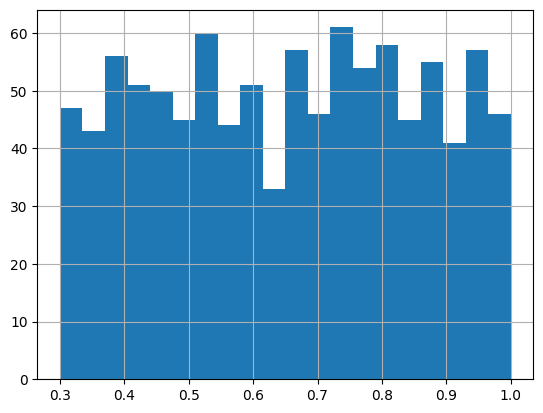

In [8]:
dataset["accuracy"].hist(bins=20)


### Summary

- Synthetic dataset successfully generated
- Data mimics real student quiz behavior
- Used for training the ML model
- Helps scale the NerdBud system

This approach is useful when real-world data is limited.
